In [192]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import re
#from PIL import Image
from keras.preprocessing import image

In [193]:
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3


# Path where our data is located
base_path = "./Data/garbage_classification_augmented/"

# Dictionary to save our 12 classes
categories_dict = {0: 'battery', 1: 'biological', 2: 'brown-glass', 3: 'cardboard', 4: 'clothes', 5: 'green-glass',
              6: 'metal', 7: 'paper', 8: 'plastic', 9: 'shoes', 10: 'trash',
              11: 'white-glass'}

print('defining constants successful!')

defining constants successful!


In [194]:
def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df

# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories_dict:
    filenames = os.listdir(base_path + categories_dict[category])
    filenames_list = filenames_list  +filenames
    categories_list = categories_list + [category] * len(filenames)
    
df = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})

df = add_class_name_prefix(df, 'filename')
df = df.sample(frac=1).reset_index(drop=True)

print('number of elements = ' , len(df))
categories = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']
df.head()
counts = df["category"].value_counts().to_dict()
counts

number of elements =  56983


{4: 5325,
 9: 5234,
 7: 5110,
 8: 4899,
 1: 4822,
 0: 4716,
 10: 4558,
 5: 4550,
 11: 4463,
 3: 4453,
 6: 4446,
 2: 4407}

In [195]:
# from keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#         rotation_range=45,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')


# for i in range(5,12):
#         print("starting with " + categories[i])
#         dupe=(int(5325/counts[i])-1)
#         print(dupe)
#         for j in range(1,counts[i]-2):
#                 img=keras.preprocessing.image.load_img("Data/garbage_classification_augmented/"+categories[i]+"/"+categories[i]+str(j)+".jpg")
#                 x=keras.preprocessing.image.img_to_array(img)
#                 x = x.reshape((1,) + x.shape)
#                 m=0
#                 for batch in datagen.flow(x, batch_size=1,
#                           save_to_dir='Data/garbage_classification_augmented/'+categories[i]+"/", save_prefix='aug', save_format='jpg'):
#                         m += 1
                        
#                         if m > dupe:
#                                 break  # otherwise the generator would loop indefinitely
#         print("done with " + categories[i])


# # img = keras.preprocessing.image.load_img('Data/garbage_classification_augmented/battery/battery1.jpg')  # this is a PIL image
# # x = keras.preprocessing.image.img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# # x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
# # print(x.shape)
# # i = 0
# # for batch in datagen.flow(x, batch_size=1,
# #                           save_to_dir='Data/garbage_classification_augmented', save_prefix='cat', save_format='jpeg'):
# #     i += 1
# #     if i > 20:
# #         break  # otherwise the generator would loop indefinitely

In [196]:
train = tf.keras.utils.image_dataset_from_directory(
    base_path,
    class_names=categories,
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    validation_split=0.2,
    subset="training",
    seed=123,
    batch_size=150
)

Found 56983 files belonging to 12 classes.
Using 45587 files for training.


In [197]:
validate=tf.keras.utils.image_dataset_from_directory(
    base_path,
    class_names=categories,
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    validation_split=0.2,
    subset="validation",
    seed=123,
    batch_size=150
)

Found 56983 files belonging to 12 classes.
Using 11396 files for validation.


In [198]:
class_names = train.class_names
class_names

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash',
 'white-glass']

In [199]:
print(len(train))
print(len(validate))

# def cut1(ds):
#     return ds.filter(lambda x,y : np.random.random() < 0.5)


# train = train.apply(cut1)
# #validate = train.filter(lambda x,y :np.random.random() < 0.5)

# print(len(train))

304
76


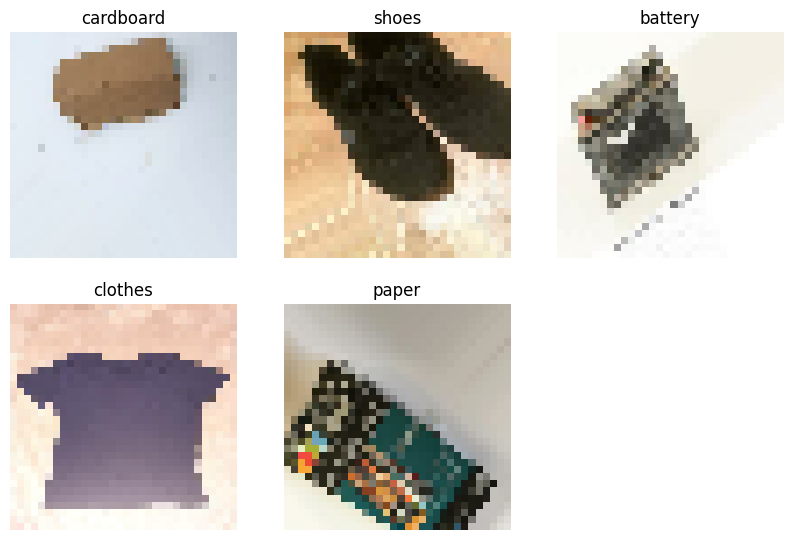

In [200]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  # images=images[:50]
  # labels=labels[:50]
  for i in range(5):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [201]:
for image_batch, labels_batch in train:
  image_batch=image_batch[:50]
  labels_batch=labels_batch[:50]
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(50, 32, 32, 3)
(50,)


In [202]:
model = keras.Sequential([
    #keras.layers.Reshape((IMAGE_WIDTH, IMAGE_HEIGHT,3)),
    keras.layers.Normalization(),
    #keras.layers.RandomFlip(mode="horizontal_and_vertical"),
    #keras.layers.RandomRotation((0.25,0.25)),
    keras.layers.Conv2D(16, (3, 3)),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None),
    keras.layers.Dropout(0.5),
    # keras.layers.RandomTranslation(0.2,0.2),
    keras.layers.Conv2D(16, (3, 3)),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None),
    keras.layers.Dropout(0.5),
    # keras.layers.RandomFlip(mode="horizontal_and_vertical"),
    keras.layers.Conv2D(32, (3, 3)),
    keras.layers.Activation("relu"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(12, activation="softmax")
])


In [203]:
model.compile(optimizer="adam", 
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])
model.build(input_shape=(None,IMAGE_WIDTH,IMAGE_HEIGHT,3))
model.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 4)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_11 (Normaliza  (None, 32, 32, 3)        7         
 tion)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 activation_43 (Activation)  (None, 30, 30, 16)        0         
                                                                 
 batch_normalization_32 (Bat  (None, 30, 30, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                     

In [204]:
train

<BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [205]:
history = model.fit(train, validation_data=validate, epochs=50, batch_size=50, callbacks=[callback])

Epoch 1/50
250/304 [=======================>......] - ETA: 4s - loss: 1.9455 - accuracy: 0.3377

KeyboardInterrupt: 

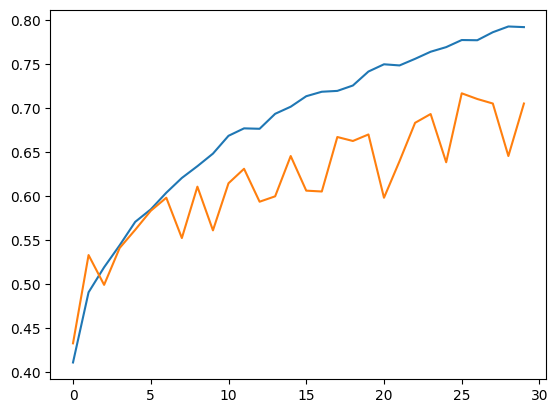

In [ ]:
ax = plt.subplot()
ax.plot(history.history["accuracy"], label="Accuracy")
ax.plot(history.history["val_accuracy"], label="Validation Accuracy")

In [ ]:
# model.save("./Models/32-75/")

In [ ]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
# tflite_model = converter.convert()
# with open('model.tflite', 'wb') as f:
#   f.write(tflite_model)

2/2 [==============================] - 0s 8ms/step
clothes
2/2 [==============================] - 0s 7ms/step
trash
2/2 [==============================] - 0s 7ms/step
clothes
2/2 [==============================] - 0s 7ms/step
biological
2/2 [==============================] - 0s 7ms/step
cardboard


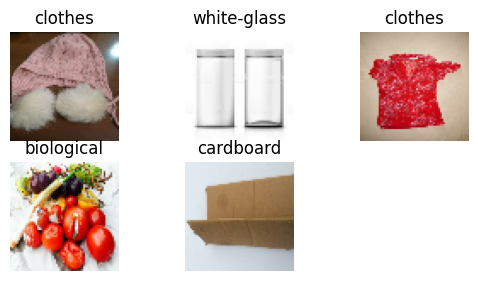

In [ ]:
for images, labels in validate.take(1):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        #print(images[i].numpy().shape)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        print(categories[np.argmax(model.predict(images)[i])])